<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_12_5(377_395).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 06 차원 축소
### 01 차원 축소(Dimension Reduction) 개요

- 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터세트를 생성하는 것으로, 차원이 증가할수록 데이터포인트간의 거리가 기하급수적으로 멀어지게 되고, 희소한 구조를 가지게 되기 때문에 예측 신뢰도가 떨어질 수 있으며, 피처가 많을 경우 다중공선성 문제가 발생할 수 있음

- 이를 해결하면 직관적인 데이터 해석과 학습에 필요한 처리능력을 줄이도록 할 수 있음

- 피처 선택과 피처 추출로 크게 나뉘며 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선별하는 피처선택, 기존 피처를 저차원의 중요피처로 압축하여 추출하는 것

- 피처추출은 기존 피처를 단순 압축이 아닌 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것으로 기존피처가 인지하기 어려웠던 잠재적인 요소를 추출하는 것을 의미

- 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적형태의 이미지 변환과 압축을 수행할 수 있어 과적합 영향력이 작아져 예측성능 개선에 도움이 됨

- 텍스트 문서의 숨겨진 의미를 추출하는 것에도 도움이 될 수 있음

### 02 PCA(Principal Component Analysis)

#### PCA 개요

- 여러 변수간 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법으로 기존 데이터의 정보유실이 불가피하기 때문에 가장 높은 분산을 가지는 데이터를 축으로 삼아 이 축으로 차원을 축소하여 주성분으로 삼음

- 데이터 변동성이 가장 큰 방향으로 축을 생성하고 새롭게 생성된 축으로 데이터를 투영하는 방식으로 두번째로는 이 벡터축에 직각이 되는 직교벡터를 축으로, 세번재로는 다시 두번째축과 직각이 되는 축으로 축을 생성한 뒤 원본 데이터를 투영하면 벡터축의의 개수만큼의의 차원으로로 원본데이터가가 차원축소됨됨

- 선형대수수 차원에서서 보았을을 때때 입력력 데이터의의 공분산산 행렬을을 고유값값 분해하고고 이럻게게 구한한 고유벡터에에 입력데이터를를 선형변환하는는 것으로로 고유벡터가가 PCA의의 주성분분 벡터로서서 입력데이터의의 분산이이 큰큰 방향을을 나타내며며 고유값은은 바로로 이이 고유벡터의의 크기를를 나타내며며 동시에에 입력데이터의의 분산을을 나타냄냄

- 선형변환이란 특정벡터에 행렬a를 곱해 새 벡터로 변환하는 것을 의미하는데 이 경우 행렬을 공간으로 가정하는 것으로 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬

- 공분산 행렬에서 대각원소가 각 변수의 분산을 의미하며 고유벡터는 행렬을 곱하더라도 방향이 변하지 않고 크기만 변하는 벡터로 정방행렬은 최대 그 차원수만큼의 고유벡터를 가질 수 있으며 행렬을 분해하는데 사용됨

- 공분산 행렬은 정방행렬이자 대칭행렬로 고유벡터를 직교행렬로 고유값을 정방행렬로 대각화할 수 있는 대칭행렬의 특징을 가짐

- 공분산 행렬의 직교행렬과 직교행렬의 전지로 나눌 수 있으며 이 방식을 이용
> 1 입력 데이터세트의 공분산 행렬을 생성
> 2 공분산행렬의 고유벡터와 고유값 계산
> 3 고유값이 가장 크느 순으로 k개(pca변환차수만큼)만큼 고유벡터를 추출
> 4 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새로 입력데이터를 변환

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
#numpy dataset>pandas dataframe
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


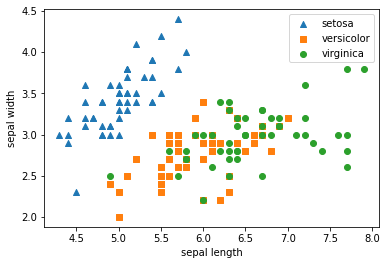

In [ ]:
#setosa triangle, versicolor square virginica circle
markers =['^','s','o']

#setosa's target 0, versicolor 1, virginica for 2. each target marks other figure
for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- versi와와 virginic는는 sepal width, sepal length로로 나누기기 어려우므로로 차원원 축소와와 시각화화 진행행

- 이를를 위해해 개별별 속성의의 스케일링링 진행

In [ ]:
from sklearn.preprocessing import StandardScaler

# target을을 제외한한 모든든 속성값을을 standardscaler를를 이용해해 표줁어규분포를를 가지는는 값들로로 변환환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#fit과과 transform을을 호출해해 pca 변환데이터터 반환환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
#pca 변환된된 데이터의의 칼럼명을을 각각각 pca_component_1, pca_component_2로로
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


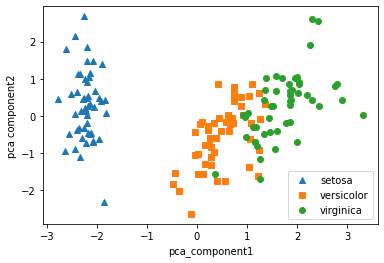

In [ ]:
#visualize, setosa for tri, versicolor for square, virginica for circle
markers = ['^', 's','o']

#pca component1 for x axis, pc component 2 for y axis and scatter plot
for i,marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component1')
plt.ylabel('pca component2')
plt.show()

- pca 변환환 이후에도도 pca component1 축축 기반의의 setosa는는 구분이이 ㅕㅁㅇ확하며며 versi virgi는는 일부부 겹치긴긴 하나나 비교적적 잘잘 구분되는데데, 이는는 pca component1이이 원본데이터의의 변동성을을 잘잘 반영했기기 때문문

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [ ]:
#pca component1이이 큰큰 비중을을 차지하는는 것을을 통해해 잘잘 함을을 알알 수수 있음음,
#이번엔엔 원본과과 변한데이터의의 분류류 결과과 비교

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('original data cross val accuracy: ', scores)
print('original data avg ccuracy: ', np.mean(scores))


original data cross val accuracy:  [0.98 0.94 0.96]
original data avg ccuracy:  0.96


In [ ]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring="accuracy", cv=3)
print('pca data cross val accuracy: ', scores_pca)
print('pca data avg ccuracy: ', np.mean(scores_pca))

pca data cross val accuracy:  [0.88 0.88 0.88]
pca data avg ccuracy:  0.88


-

##### 신용카드 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
#header로로 의미없는는 첫행행 제거거, iloc으로로 기존존 id 제거거
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ESAA/credit card.xls',header=1,sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
# 3만개의 레코드 와 24개의 속성을 가지며
# 디폴트 넥스트 먼스 속성이 다음달 연체여부라는 타겟값(연체 1, 정상납부 0)
df.rename(columns = {'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)


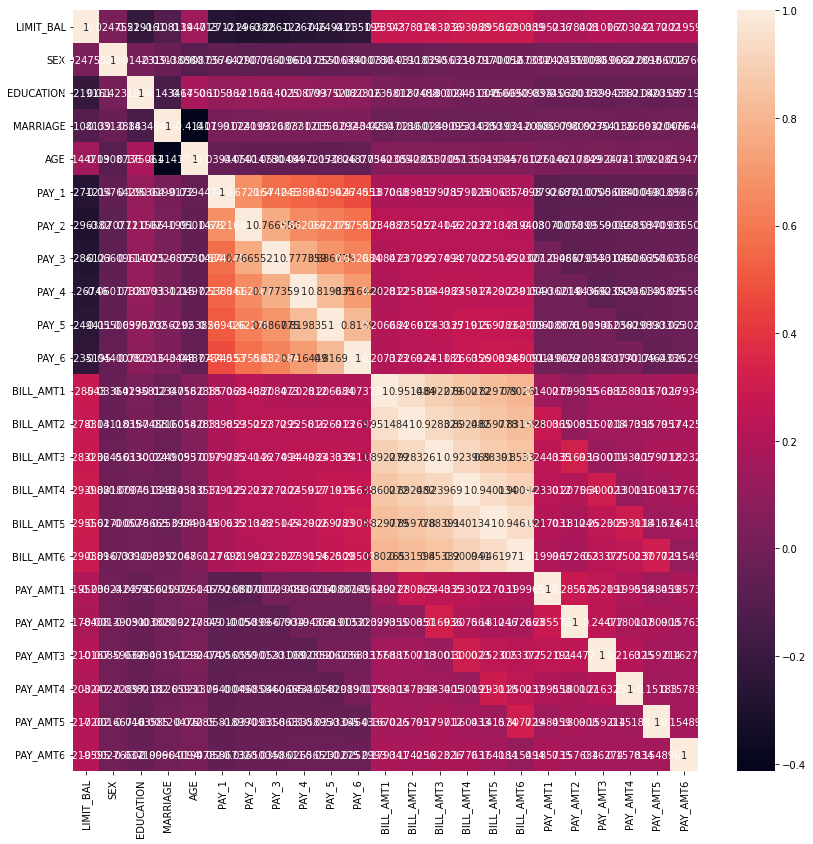

In [ ]:
#속성끼리의의 상관도도 확인인
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt = '1g')

In [ ]:
# high corr > little pca can extract(?)
# after pca transforming, check each component's change
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#bill amt1 - bill amt6까지지 6개의의 속성명명 생성성
cols_bill = ['BILL_AMT'+ str(i) for i in range(1,7)]
print('대상상 속성명명: ',cols_bill)

#두개의의 pca 속성을을 가진진 pca 객체체 생성성 후후 explained variance ratio 계산을을 위해해 Fit 호출출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA component 별별 변동성성: ', pca.explained_variance_ratio_)


대상상 속성명명:  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA component 별별 변동성성:  [0.90555253 0.0509867 ]


In [ ]:
#2개의의 pca component로로 6개의의 변동성을을 설명할할 수수 있을을 정도로로 6개의의 상관도가가 매우우 높음음
#원본데이터터 세트와와 pca 변환한한 데이터세트의의 분류예측결과를를 상호비교교

# 원본데이터터 세트의의 분류예측결과과
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('cv=3인 경우의의 개별별 폴드세트별별 accuracy: ', scores)
print('avg accuracy :{0:.4f}'.format(np.mean(scores)))

TypeError: ignored

In [ ]:
#avg accuracy 87.71percent
# same classification predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# StandardScaler for original dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

#6 component PCA transform and classification predict with cross_Val_score
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf,df_pca, y_target, scoring='accuracy', cv=3)

print('cv=3 에서서 pca변환된된 each fold set s accuracy: ', scores_pca)
print('pca 변환환 데이터세트트 평균정확도도 :{0:.4f}'.format(np.mean(scores_pca)))



cv=3 에서서 pca변환된된 each fold set s accuracy:  [0.7897 0.7938 0.8016]
pca 변환환 데이터세트트 평균정확도도 :0.7950


일부의 성능예측 저하 발생( 뛰어난 압축능력 암시)

### 03 LDA (Linear Discriminant ANalysis)

#### LDA 개요

- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소하는 것으로 입력데이터의 변동성의 가장 큰 축을 찾는 pca와 달리 lda는 입력데이터의 결정값 클래스를 최대한으로 분리할 수 있는 축을 찾음

- 클래스간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소하는데, 즉 클래스간 분산은 최대한 크게(클래스끼리는 멀리 떨어뜨려 놓고), 클래스 내부의 분산은 최대한 작게(같은 클래스 애들끼리 최대한 뭉쳐있게) 가져가는 방식

- how to get LDA
> 1 클래스 내부와 클래스간 분산 행렬을 구한다. 이 두개의 행렬은 입력 데이터와 결정값 클래스별 개별 피처의 평균 벡터를 기반으로 구함

  > 2 클래스 내부 분산 행렬을 sw, 클래스간 분사냉렬을 sb라 하면 sw.T @ sb로 고유벡터 분해 가능

  > 3 고유값이 가장 큰 순으로 k개(lda 변환 차수만큼)추출
  
  > 4 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력데이터를 변환

#### 붓꽃 데이터 세트에 lda 적용하기

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


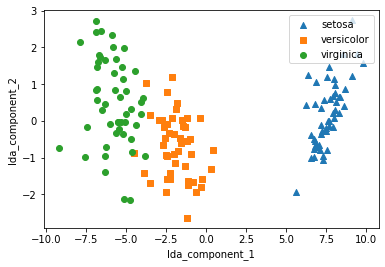

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

#tri for setosa, square for versicolor, circle for vitrginica
markers = ['^', 's','o']
#0 for setosa, 1 for versicolor, 2 for vitrginica ( in target )
# other figure for each target
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()